# Сущность модели "Случайный лес"

1. **Общие сведения**
Случайный лес (Random Forest) – алгоритм машинного обучения, основанный на использовании ансамбля решающих деревьев, каждое из которых само по себе даёт очень невысокое качество классификации, но за счёт их большого количества достигается необходимый результат.

Алгоритм сочетает в себе две основные идеи:

•    метод бэггинга Бреймана,

•    метод случайных подпространств, предложенный Тин Кам Хо.

Алгоритм применяется для задач классификации, регрессии и кластеризации.

**Достоинства:**

•    Способность эффективно обрабатывать данные с большим числом признаков и классов;

•    Нечувствительность к любым монотонным преобразованиям значений признаков;

•    Одинаково хорошо обрабатываются как непрерывные, так и дискретные признаки;

•    Существуют методы оценивания значимости отдельных признаков;

•    Внутренняя оценка способности модели к обобщению;

•    Высокая параллелизуемость и масштабируемость;

•    Случайные леса очень гибки и обладают очень высокой точностью.


**Недостатки:**

•    Большой размер получающихся моделей;

•    Построение леса сложнее и отнимает больше времени;

•    Чем больше объем, тем меньше интуитивное понимание.

2. **Бэггинг**

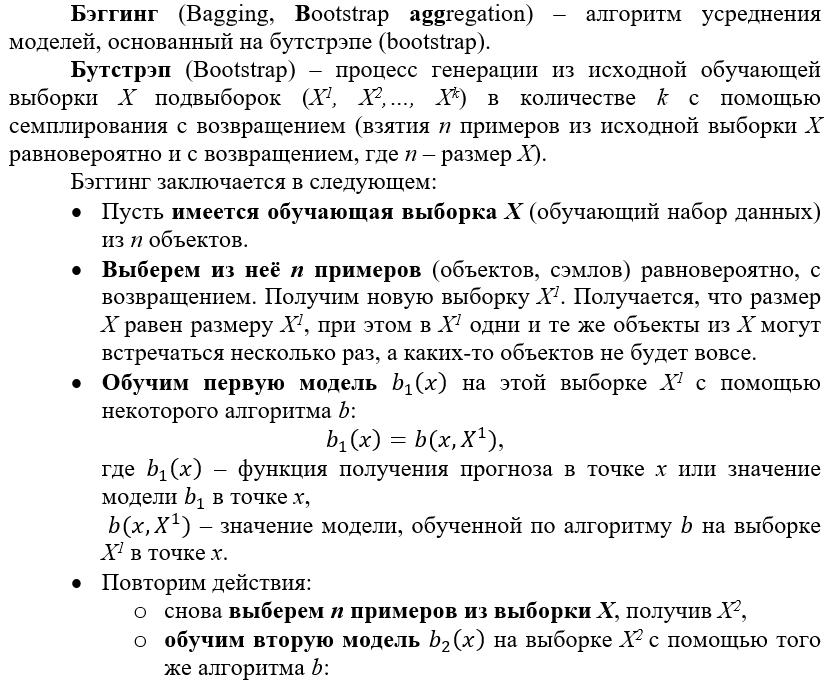

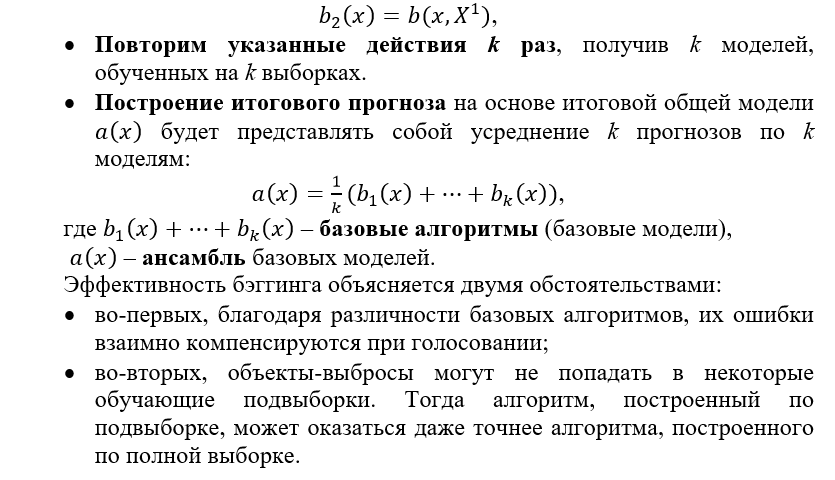

Бэггинг особенно эффективен на малых выборках, когда исключение даже небольшой доли обучающих объектов приводит к построению существенно различных базовых алгоритмов.


3. **Метод случайных подпространств**

Метод случайных подпространств (Random Subspace Method, RSM) базовые алгоритмы обучаются на различных подмножествах признакового описания, которые выделяются случайным образом.

Этот метод предпочтителен в задачах с большим числом признаков и относительно небольшим числом объектов, а также при наличии избыточных неинформативных признаков. В этих случаях алгоритмы, построенные по части признакового описания, могут обладать лучшей обобщающей способностью по сравнению с алгоритмами, построенными по всем признакам.


4.  **Случайный лес**

Слуйчаный лес – развитие идеи бэггинга для решающих деревьев.

Случайный лес – ансамбль алгоритмов, где базовые алгоритмы – решающие деревья.

При этом важно, чтобы базовые алгоритмы (модели) не были коррелированны, то есть в определенной степени были не похожи друг на друга.

Случайный лес – алгоритм, использующий одновременно метод случайных подпространств и бэггинг. Разбиение объектов в вершине случайного леса ищется среди случайного подмножества признаков, а обучение каждого дерева в композиции происходит на выборке, полученной с помощью операции бутстрапа.

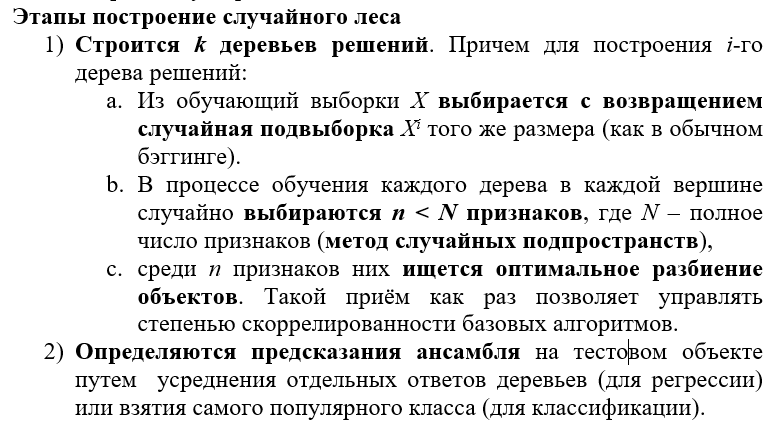

# Создание и обучения модели "Случайный лес" на Python

1. **Описание подготовленного набора данных**

Исследуем набор данных Mushroom Data Set, предназначенный для проведения бинарной классификации грибов. Набор данных включает 8124 наблюдений по 22 показателям. То есть каждое наблюдение представляет собой отдельный гриб, характеризующийся 22 показателями. Каждый показатель является качественным, то есть включает только буквенные обозначения. Каждый гриб классифицируется на 2 класса: ядовитый гриб (метка p) и неядовитый гриб (метка e).
Набор данных можно скачать с сайта школы Donald Bren School of Information and Computer Sciences: https://archive.ics.uci.edu/ml/datasets/Mushroom


2. **Импорт данных и подключение библиотек**

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.neural_network import MLPClassifier        # Многослойный перцептрон
from sklearn.model_selection import train_test_split    # Разбивка на обуч. и тест. выборки
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Метрики
from sklearn.metrics import classification_report, confusion_matrix                 # Сводка по классификаци, матрица ошибок


Импортируем набор данных Mushroom Data Set:

In [2]:
df = pd.read_csv('/content/agaricus-lepiota3 (1).csv', sep = ';', header = 0)

In [4]:
Y = df.iloc[:, 0]     # Target
X = df.iloc[:, 1:]    # Features

3. **Разделение исходного набора на обучающий и тестовый**

Разделим набор данных на обучающую и тестовую выборки с помощью функции sklearn.model_selection.train_test_split(), принимающей в качестве параметров следующие основные аргументы:

•    *arrays – последовательность индексируемых элементов одинаковой длины (символ «*» используется для указания переменного числа аргументов),

•    *test_size* – размер тестовой выборки (от 0 до 1, где 1 – 100% от исходного набора данных),

•    *random_state* – случайное состояние (целое число). Используется, если необходимо одно и то же случайное разделение. Если random_state = None (изначальное значение), то при вызове функции разделения будут всегда разными.

Дополнительную информацию см. в документации: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Разделим набор на обучающую выборку (80% изначальных строк) и тестовую выборку (20% оставшихся строк):

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

4. **Создание модели «Случайный лес»**

Создать модель случайного леса как модель-классификатор (Random Forest Classifier) можно с помощью библиотеки scikit-learn и класса sklearn.ensemble.

RandomForestClassifier. Некоторые основные параметры (атрибуты экземпляра класса, значения которых указывается при вызове метода-конструктора в качестве значений аргументов) представлены ниже:

•    n_estimators – число деревьев в лесе. По умолчанию n_estimators = 100.

•    criterion – функция для измерения качества разделения, по умолчанию равная 'gini'. Имеется возможность указать функию информационной энтропии 'entropy' или 'log_loss';

•    splitter – стратегия, используемая для выбора разделения на каждом узле. По умолчанию указано значение 'best', также можно указать 'random';

•    max_depth – максимальная глубина дерева.  По умолчанию указано значение 'None', в этом случае то узлы расширяются до тех пор, пока все листья не станут чистыми или пока все листья не будут содержать менее min_samples_split выборок.

•    min_samples_split – минимальное число примеров, необходимое для разделения
внутреннего узла, по умолчанию равное 2;

•    min_samples_leaf – минимальное число примеров, которое должно находиться в листовом узле, по умолчанию равное 1;

•    max_features – число переменных, которые будут учитываться при поиске лучшего разделения. По умолчанию max_features = None, что означает max_features = n_features, т.е. равенство числу переменных в наборе данных, переданным методом fit() при обучении модели. Допустимы также значения:

- 'sqrt' – соответствует max_features = sqrt(n_features);

- 'log2' – соответствует max_features = log2(n_features);

- 'auto' – соответствует max_features = sqrt(n_features) при классификации и max_features = n_features при регрессии.

•    max_leaf_nodes – максимальное число узлов в дереве, по умолчанию равное None, т.е. без ограничений;

Дополнительную информацию см. в документации: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [9]:
# Создание модели дерева решений
rf = RandomForestClassifier(random_state = 0)

# Поиск оптимальных гиперпараметров через "Поиск по сетке"
param_grid = {'n_estimators': [100, 200, 300, 400, 500],
              'max_features': [None, 'sqrt', 'log2'],
                  'max_depth': [3, 4, 5]}
GSCV_rf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, verbose = 3)
GSCV_rf.fit(X_train, Y_train)
print('GSCV_rf.best_params_:', GSCV_rf.best_params_)
model_rf = GSCV_rf.best_estimator_        # Сохранение модели с оптимальными гиперпараметрами

Fitting 10 folds for each of 45 candidates, totalling 450 fits
[CV 1/10] END max_depth=3, max_features=None, n_estimators=100;, score=0.966 total time=   0.5s
[CV 2/10] END max_depth=3, max_features=None, n_estimators=100;, score=0.948 total time=   0.5s
[CV 3/10] END max_depth=3, max_features=None, n_estimators=100;, score=0.957 total time=   0.5s
[CV 4/10] END max_depth=3, max_features=None, n_estimators=100;, score=0.965 total time=   0.5s
[CV 5/10] END max_depth=3, max_features=None, n_estimators=100;, score=0.955 total time=   0.5s
[CV 6/10] END max_depth=3, max_features=None, n_estimators=100;, score=0.957 total time=   0.5s
[CV 7/10] END max_depth=3, max_features=None, n_estimators=100;, score=0.963 total time=   0.5s
[CV 8/10] END max_depth=3, max_features=None, n_estimators=100;, score=0.958 total time=   0.5s
[CV 9/10] END max_depth=3, max_features=None, n_estimators=100;, score=0.966 total time=   0.5s
[CV 10/10] END max_depth=3, max_features=None, n_estimators=100;, score=0

5. **Обучение модели дерева решений**

Обучение модели реализуется с помощью метода fit().

In [10]:
model_rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, random_state=0)

6. **Тестирование и оценка качества модели дерева решений**

С помощью метода predict() построим прозгноз по тестовому набору данных и сформируем матрицы ошибок для бинарной классификации:

In [11]:
#Тестирование модели(прогноз)
Y_train_pred = model_rf.predict(X_train)    # Прогноз для обучающей выборки
Y_test_pred = model_rf.predict(X_test)      # Прогноз для тестовой выборки

# Матрицы ошибок
cm_train = confusion_matrix(Y_train, Y_train_pred)
cm_test = confusion_matrix(Y_test, Y_test_pred)

# Таблицы для матриц ошибок в виде тепловых карт
labels = ['0', '1']
df_cm_train = pd.DataFrame(cm_train, index = labels, columns = labels)
df_cm_test = pd.DataFrame(cm_test, index = labels, columns = labels)

print('\ndf_cm_train:', df_cm_train, sep = '\n')
print('\ndf_cm_test:', df_cm_test, sep = '\n')


df_cm_train:
      0     1
0  3381     0
1    51  3065

df_cm_test:
     0    1
0  826    0
1   13  786


Text(0.5, -7.277777777777782, 'Predicted class labels')

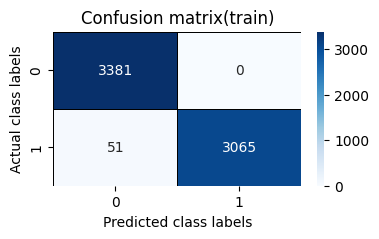

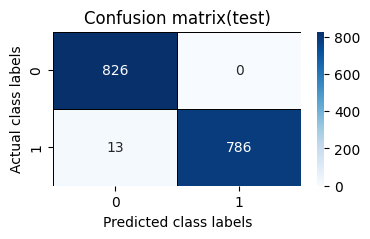

In [12]:
# Матрица ошибок в виде тепловой карты (обучающая выборка)
figure1 = plt.figure(1, figsize = (4, 2))      # Рисунок (лист для графика)
ax = plt.axes()                                # Оси
sns.heatmap(df_cm_train, figure = figure1, ax = ax,
            annot = True, fmt = '.0f', cmap = 'Blues',
            linewidth = .5, linecolor = 'black')
ax.set_title('Confusion matrix(train)')
ax.set_ylabel('Actual class labels')
ax.set_xlabel('Predicted class labels')

# Матрица ошибок в виде тепловой карты (тестовая выборка)
figure2 = plt.figure(2, figsize = (4, 2))      # Рисунок (лист для графика)
ax = plt.axes()                                # Оси
sns.heatmap(df_cm_test, figure = figure2, ax = ax,
            annot = True, fmt = '.0f', cmap = 'Blues',
            linewidth = .5, linecolor = 'black')
ax.set_title('Confusion matrix(test)')
ax.set_ylabel('Actual class labels')
ax.set_xlabel('Predicted class labels')

**Рассчитаем метрики:**

In [13]:
accuracy_train = accuracy_score(Y_train, Y_train_pred)
accuracy_test = accuracy_score(Y_test, Y_test_pred)
precision_train = precision_score(Y_train, Y_train_pred)
precision_test = precision_score(Y_test, Y_test_pred)
recall_train = recall_score(Y_train, Y_train_pred)
recall_test = recall_score(Y_test, Y_test_pred)
f1_train = f1_score(Y_train, Y_train_pred)
f1_test = f1_score(Y_test, Y_test_pred)
print('accuracy (train)', accuracy_train)
print('accuracy (test)', accuracy_test)
print('precision (train)', precision_train)
print('precision (test)', precision_test)
print('recall (train)', recall_train)
print('recall (test)', recall_test)
print('f1 (train)', f1_train)
print('f1 (test)', f1_test)

accuracy (train) 0.9921502231799292
accuracy (test) 0.992
precision (train) 1.0
precision (test) 1.0
recall (train) 0.983632862644416
recall (test) 0.983729662077597
f1 (train) 0.9917489079436984
f1 (test) 0.9917981072555205


Построим графики по исходным данным:

In [15]:
# Функция построения 3 точечных диаграмм на 1 рисунке

def scatter_1x3plots(df_plot, title = None):

    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

    indexes_cols_pairs = [(1, 2), (1, 3), (2, 3)]



    # Создание цветовой карты

    cvals  = [0, 1]

    colors = ['royalblue', 'darkorange']

    norm=plt.Normalize(min(cvals), max(cvals))

    tuples = list(zip(map(norm, cvals), colors))

    cmap = mpl.colors.LinearSegmentedColormap.from_list('', tuples)



    # Построение 3 графиков на 1 рисунке

    for i in range(3):

        idx_col1 = indexes_cols_pairs[i][0]

        idx_col2 = indexes_cols_pairs[i][1]

        s = axs[i].scatter(x=df_plot.iloc[:, idx_col1],

                       y=df_plot.iloc[:, idx_col2],

                       alpha=0.41, s=290, linewidth=0,

                       c=df_plot.iloc[:, 0], cmap = cmap)

        axs[i].set_xlabel(df_plot.iloc[:, idx_col1].name)

        axs[i].set_ylabel(df_plot.iloc[:, idx_col2].name)

        plt.tight_layout()

        # Легенда

        legend1 = axs[i].legend(*s.legend_elements(),

                                loc='upper left', title='class')

        axs[i].add_artist(legend1)



    # Заголовок

    fig.suptitle(title, fontsize=20)

    plt.tight_layout()




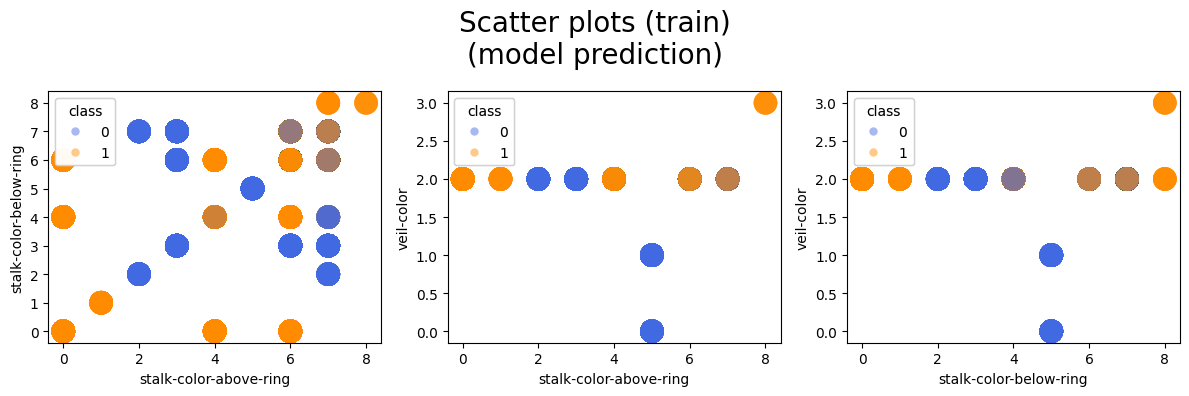

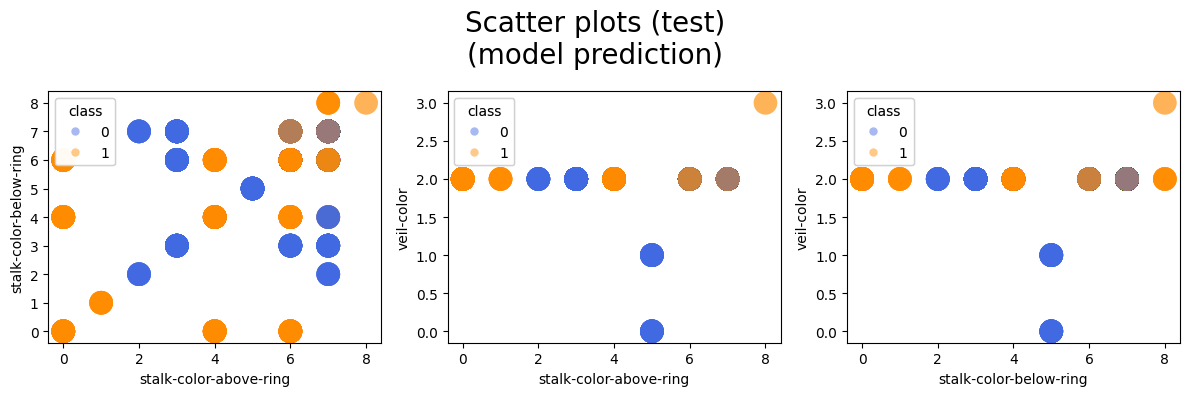

In [16]:
# Объединение Y_train, X_train
df_train = pd.DataFrame(Y_train)
df_train = df_train.join(X_train)
df_train = df_train.iloc[:, [0, 14, 15, 16]]      # Выбор факторов
scatter_1x3plots(df_plot = df_train, title = 'Scatter plots (train)\n(model prediction)')   # График

# Объединение Y_test, X_test
df_test = pd.DataFrame(Y_test)
df_test = df_test.join(X_test)
df_test = df_test.iloc[:, [0, 14, 15, 16]]        # Выбор факторов
scatter_1x3plots(df_plot = df_test, title = 'Scatter plots (test)\n(model prediction)')     # График


Построим графики по прогнозам модели:

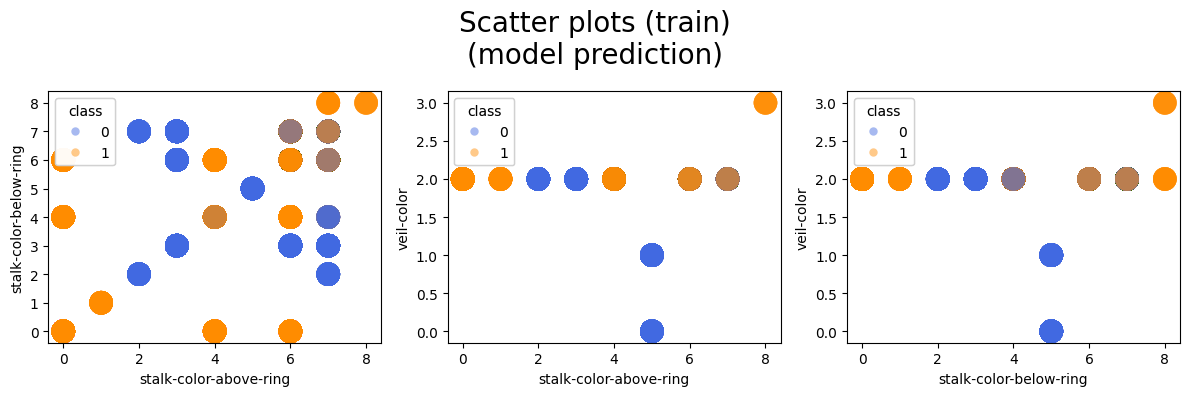

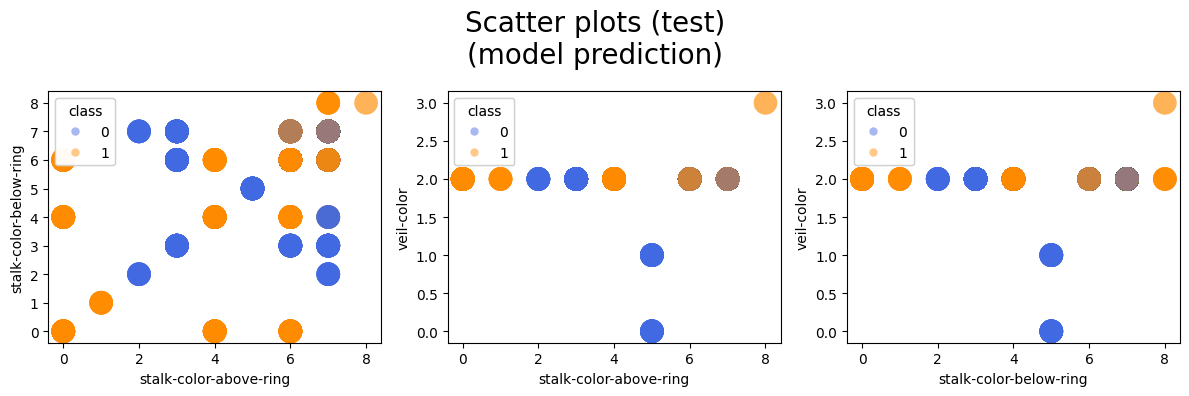

In [17]:
# Объединение Y_train, X_train
df_2_train = pd.DataFrame(Y_train_pred)
df_2_train = df_2_train.join(X_train.reset_index(drop = True))
df_2_train = df_2_train.iloc[:, [0, 14, 15, 16]]      # Выбор факторов
scatter_1x3plots(df_plot = df_2_train, title = 'Scatter plots (train)\n(model prediction)')   # График

# Объединение Y_test, X_test
df_2_test = pd.DataFrame(Y_test_pred)
df_2_test = df_2_test.join(X_test.reset_index(drop = True))
df_2_test = df_2_test.iloc[:, [0, 14, 15, 16]]        # Выбор факторов
scatter_1x3plots(df_plot = df_2_test, title = 'Scatter plots (test)\n(model prediction)')     # График


Как видно по матрицам ошибок, метрикам и графикам, полученная модель случайного леса проводит классификацию с большой точностью.